In [4]:
%matplotlib inline

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from mpl_toolkits.basemap import Basemap

ImportError: No module named basemap

In [5]:
import sklearn

In [6]:
from sklearn.cluster import k_means

In [7]:
import json

In [8]:
business_json = "../yelp_academic_dataset_business.json"

In [9]:
import pandas as pd

In [6]:
f = open(business_json, 'r')

In [ ]:
data = []


In [10]:
# from Patrick's notebook
BUSINESSES = "../yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json"

In [11]:
COLS_TO_READ = ['state', 'longitude', 'latitude', 'name', 'stars']

In [12]:
ff = open(BUSINESSES)
results = []
dfs = []
categories = set()
for line in ff.xreadlines():
    result = json.loads(line)
    if (result['state'] == 'QC'):# and ('Restaurants' in result['categories']):
        dfs.append(pd.DataFrame(result, columns=COLS_TO_READ, index=pd.Index([result['business_id']])))
df = pd.concat(dfs)
del dfs

# Set index name to "business_id"
df.index.name = 'business_id'

In [14]:
df.columns

Index([u'state', u'longitude', u'latitude', u'name', u'stars'], dtype='object')

In [17]:
df.head()

,state,longitude,latitude,name,stars
business_id,,,,,
lW9Up8oVTWUEut_R6nZG-g,QC,-73.544570,45.545073,Atomic Café,4.0
rWmYk-i8EF-g07KnVkdlqQ,QC,-73.542120,45.561749,Restaurant Les Princesses,2.5
RZma06CqXbOIMzTQL-eJFQ,QC,-73.635581,45.589137,La Cage Aux Sports,2.0
GxfgoiDLfs7HC8C_wFsGPw,QC,-73.574577,45.548671,Boulangerie Première Moisson,4.5
e1_MTuBa4LTN1E2RKh53Xg,QC,-73.585389,45.555818,Zytynsky's Deli,4.5


In [26]:
df.loc[:,('longitude', 'latitude')]

,longitude,latitude
business_id,,
lW9Up8oVTWUEut_R6nZG-g,-73.544570,45.545073
rWmYk-i8EF-g07KnVkdlqQ,-73.542120,45.561749
RZma06CqXbOIMzTQL-eJFQ,-73.635581,45.589137
GxfgoiDLfs7HC8C_wFsGPw,-73.574577,45.548671
e1_MTuBa4LTN1E2RKh53Xg,-73.585389,45.555818
yLj-pKIc-V530j1G6ySQ2Q,-73.552666,45.567943
IY5GFZTZCywC0ylKuG9ebA,-73.559333,45.540425
g8Ja8BKskzmWHX9VH7B2yg,-73.566166,45.551943
Env21pieyFD60kaC0xbmcg,-73.542183,45.584279


In [29]:
geoclusters = k_means(df.loc[:,('longitude', 'latitude')], 100)

In [42]:
geoclusters[0][0] # first element of the first cluster

array([-73.56578814,  45.51651935])

In [33]:
geoclusters[0][1].mean() # meaningless, avging lat and long for one elt

-14.10552595779863

In [40]:
df.describe()

,longitude,latitude,stars
count,4942.000000,4942.000000,4942.000000
mean,-73.602766,45.510923,3.710036
std,0.070349,0.031680,0.769009
min,-73.994516,45.401767,1.000000
25%,-73.612711,45.496027,3.500000
50%,-73.578865,45.510540,4.000000
75%,-73.567498,45.524995,4.500000
max,-73.450201,45.730644,5.000000


In [43]:
geoclusters[0]

array([[-73.56578814,  45.51651935],
       [-73.70282852,  45.4917766 ],
       [-73.85839222,  45.45224272],
       [-73.62463004,  45.4984731 ],
       [-73.74694567,  45.56389035],
       [-73.57773752,  45.48102045],
       [-73.60899324,  45.53189592],
       [-73.57215633,  45.59857181],
       [-73.47010657,  45.4532373 ],
       [-73.62187475,  45.47134375],
       [-73.57709422,  45.53203195],
       [-73.79841525,  45.48378011],
       [-73.54160601,  45.5488415 ],
       [-73.81791163,  45.57080687],
       [-73.62972085,  45.54323453],
       [-73.46895502,  45.47763263],
       [-73.94955603,  45.40537838],
       [-73.57391555,  45.49966055],
       [-73.680728  ,  45.51215991],
       [-73.84469154,  45.63798959],
       [-73.65600519,  45.71043099],
       [-73.65316215,  45.53395805],
       [-73.75201891,  45.45526843],
       [-73.78736334,  45.61608385],
       [-73.70567015,  45.57693084],
       [-73.68286123,  45.43322076],
       [-73.55756322,  45.50168846],
 

In [52]:
print geoclusters[0].transpose()[0].mean() # mean long for cluster
print geoclusters[0].transpose()[1].mean() # mean lat for cluster

-73.652464177
45.5211006118


In [72]:
len(geoclusters)

3

In [99]:
# cluster labels
cluster_labels = geoclusters[1]
cluster_labels

array([12, 69, 49, ..., 17, 17,  3], dtype=int32)

In [104]:
# Get the size of each cluster (ie number of members)
cluster_sizes = []
for i in range(0, 100):
    cluster_sizes.append(list(cluster_labels).count(i))

In [81]:
cluster_centers = geoclusters[0]

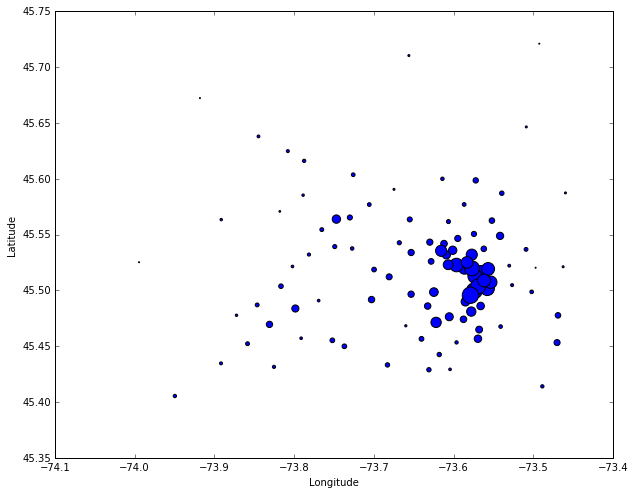

In [109]:
plt.figure(figsize=(10,8))
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1], s=cluster_sizes)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes()
mtlmap = Basemap(ax=ax, projection='cyl', lon_0=-73.5673, lat_0=45.5017,
                 llcrnrlon=-73.953833, llcrnrlat=45.401767, urcrnrlon=-73.450201, urcrnrlat=45.730644,
                height=60000, width=60000, resolution='l')
mtlmap.drawcoastlines()
#mtlmap.drawstates()
#mtlmap.drawcountries()
ind = df['stars']>-1
scatt = mtlmap.scatter(df['longitude'][ind], df['latitude'][ind], c=df['stars'][ind], s=50, alpha=0.5)
#print xx
cbar = mtlmap.colorbar(scatt)
cbar.set_label("Stars")